<a href="https://colab.research.google.com/github/mfdali/BootcampDataAnalytics/blob/main/classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelos de Classificação: Regressão Logística


## Bibliotecas

In [1]:
# Import packages
# Data manipulation
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
# Models
from sklearn import preprocessing
from sklearn import datasets
# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos

In [2]:
# ignore warnings
import warnings
warnings.simplefilter(action='ignore')

## Funções

In [81]:
# Boxplot

def plot_box(df,group='target'):
  # Get list of column name
  columns = list(df.columns)
  # remove y axis from the list
  columns.remove(group)

  # Create graph for each column
  for column in columns:
    # Set window size
    fig,ax = plt.subplots(figsize=(6,4))
    # Plot
    ax = df.plot(column=[column],by=group,kind = 'box', subplots = True, layout = (2,4), sharex = False, sharey = False, figsize = (18,10),
                color=dict(boxes='thistle', whiskers='k', medians='purple', caps='k'), patch_artist=True, ax=ax)

    # Set axis title
    plt.ylabel(column)
    plt.xlabel(group)

    # Change background color
    plt.rcParams['axes.facecolor'] = 'white'

    # Show graph
    plt.show()

In [76]:
def plot_count(df,hue_groups=None):

    sns.set_style("whitegrid")
    # Create bar plot of frequencies
    plt.rcParams['figure.figsize'] = [4, 8]

    # Get column labels to a list
    list_columns = list(df.select_dtypes(include='object').columns)

    if hue_groups in list_columns:
        list_columns.remove(hue_groups)

    # Create bar plot for each dataframe column
    for column in list_columns:
        # Set window size
        fig,ax = plt.subplots(figsize=(8, 4))
        #table = df[column].value_counts().sort_values(ascending=False)
        ax = sns.countplot(data=df, x = column, palette='flare', hue=hue_groups)

        # labels appear outside of plot area, so auto-adjust
        ax.figure.tight_layout()
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

        # Change background color
        plt.rcParams['axes.facecolor'] = 'white'

        # Set style
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=0)
        plt.grid('off')#axis='y', linestyle='--', alpha=0.7)

        # Set style
        plt.style.use('default')
        fig.patch.set_facecolor('xkcd:white')
        plt.rcParams['font.size'] = 12
        plt.rcParams['legend.fontsize'] = 11
        plt.rcParams['xtick.direction'] = 'in'
        plt.rcParams['ytick.direction'] = 'in'
        fig.tight_layout()

        # Show graph
        plt.show()

In [5]:
#Histogram
def plot_histogram(df,limits=False,hue_groups=None):

    plt.rcParams['figure.figsize'] = [4, 8]
    sns.set_theme()
    sns.set(font_scale=1.2)

    # Get column labels to a list
    list_columns = list(df.select_dtypes(include=np.number).columns)
    if hue_groups in list_columns:
        list_columns.remove(hue_groups)

    # create histplots
    for column in list_columns:
        # Set window size
        plt.figure(figsize=(8, 4))
        # plot
        ax = sns.histplot(data = df , x = column, kde= True,stat="density",hue=hue_groups, color = "darkseagreen", palette = 'viridis')

        # labels appear outside of plot area, so auto-adjust
        ax.figure.tight_layout()

        # Add legend
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

        # Add title
        plt.title(column)

In [6]:
# 3d plot
def plot_3d(df,a,b,c,target):
    fig = plt.figure()

    # syntax for 3-D projection
    ax = plt.axes(projection ='3d')

    for i in list(df[target].unique()):
      # defining all 3 axis
      x = df[df[target]==i][a]
      y = df[df[target]==i][b]
      z = df[df[target]==i][c]

      # plotting
      ax.scatter(x, y, z, c='C'+str(i+2))

    # Add axis labels
    ax.set_xlabel(a)
    ax.set_ylabel(b)
    ax.set_zlabel(c)

    # Add legend
    plt.legend(title=target, loc='upper left', bbox_to_anchor=(1.0,1.05))

    # Add gridlines
    plt.grid(True, linestyle=':')

    # Set style
    plt.style.use('default')
    fig.patch.set_facecolor('xkcd:white')
    plt.rcParams['font.size'] = 12
    plt.rcParams['legend.fontsize'] = 11
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    fig.tight_layout()

    # Customize the view angle so it's easier to see that the scatter points lie
    # on the plane y=0
    ax.view_init(elev=30., azim=-85, roll=0)

    # Show graph
    plt.show()

# Iris dataset


**Descrição das colunas:**

- Rótulo originais das colunas

  colunas_originais =
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']
       
- Rótulos em português

  rotulos_colunas =
['comprimento_sepala',
'largura_sepala', 'comprimento_petala', 'largura_petala', 'especie']

**Variável resposta ou Target:**

- Espécie

**Classificações:**

- 0: 'iris-setosa'

- 1: 'iris-versicolor'

- 2: 'iris-virginica'



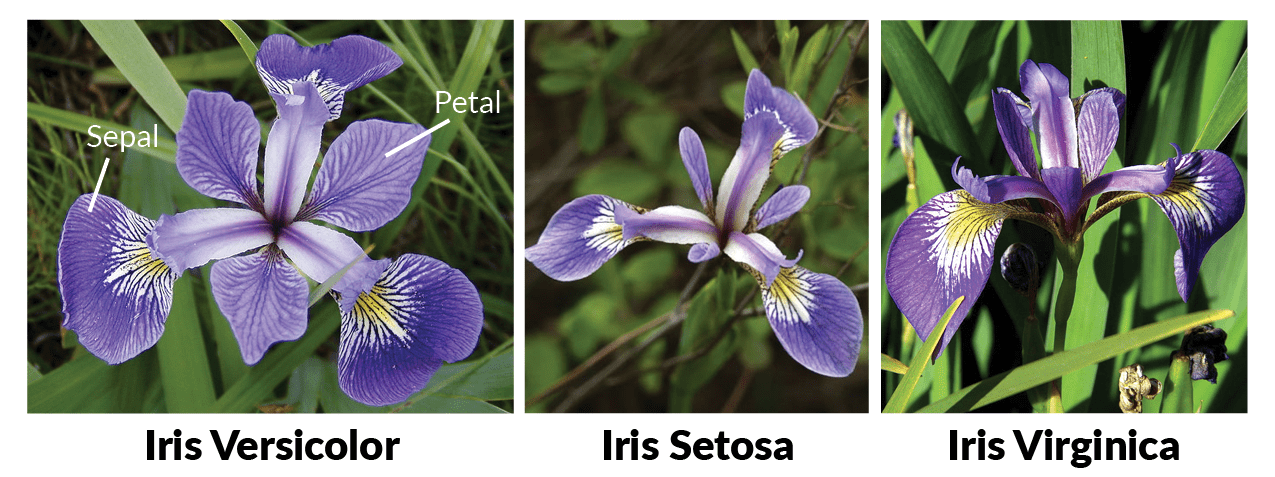

## Carga de dados

In [7]:
# Import iris dataset from Scikit-Learn
iris_data = datasets.load_iris(as_frame=True)

In [8]:
# Get dataframe
iris = iris_data.frame

In [9]:
# Show first lines
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Análise Inicial

In [10]:
# dataset size
iris.shape

(150, 5)

In [11]:
# Check data type of columns
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [12]:
# Checking for missing values
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [74]:
# Summary statistics of numerical columns
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [14]:
# Data transformation
# Make a copy of dataset
iris_labels = iris.copy()
# dummy from int to object
iris_labels['target']= iris_labels['target'].astype('object')

target
0    50
1    50
2    50
Name: count, dtype: int64


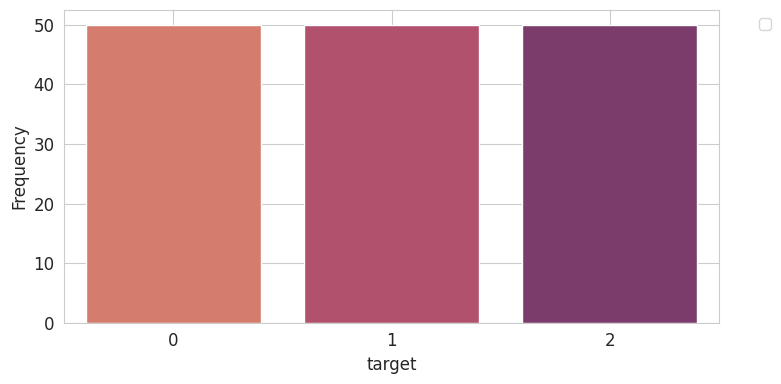

In [78]:
# Count
print(iris_labels['target'].value_counts())
plot_count(iris_labels)

A base de dados esta bem equilibrada contendo o mesma quantidade de observações por classe, 50 para cada espécie.

O dataset possui:

* 150 linhas de dados

* 50 observações por classificação

* Não apresenta nulos
* Todos os atributos são numéricos

* 3 classificações:
 [0,1,2] correpondendo a 0: 'iris-setosa', 1: 'iris-versicolor', 2: 'iris-virginica'

* 4 atributos (todos numéricos):
['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']



In [16]:
list(iris.columns)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']

## Gráficos

### Boxplot

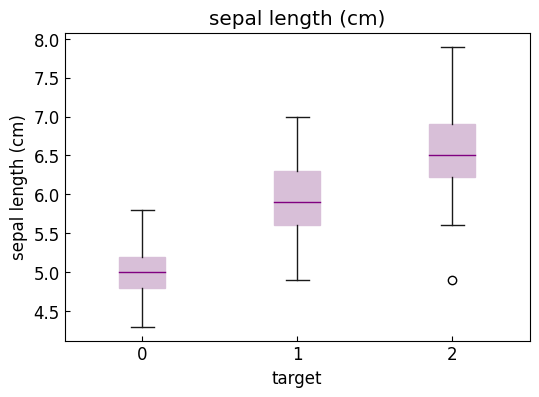

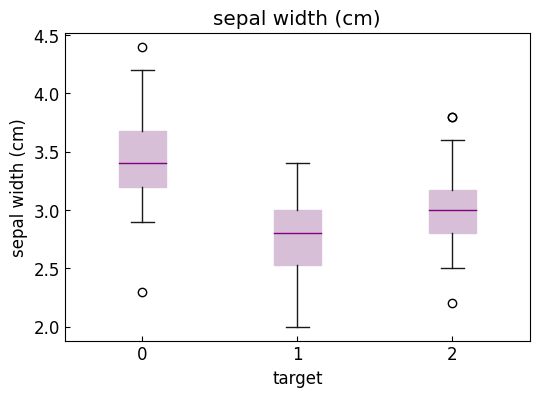

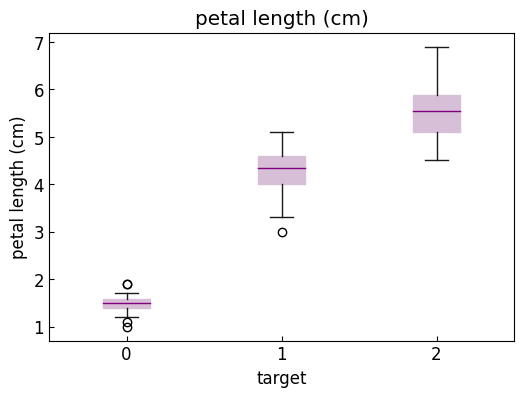

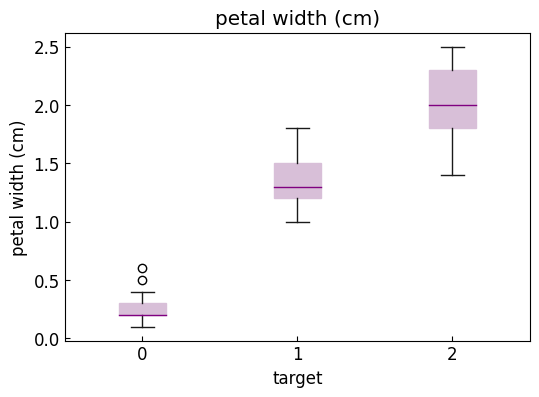

In [82]:
plot_box(iris,group='target')

### Histograma

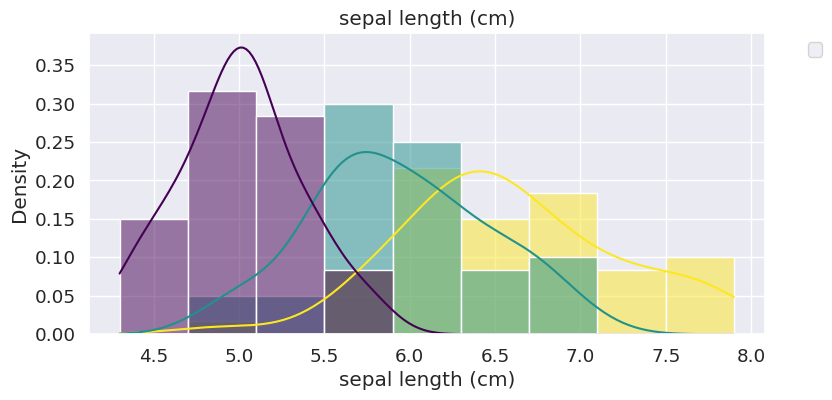

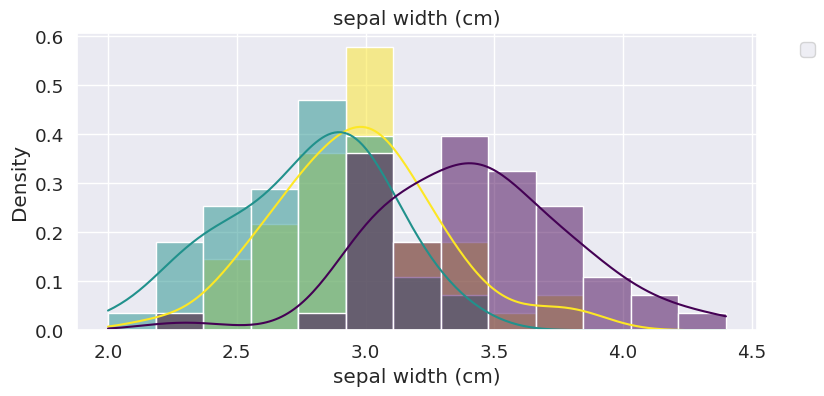

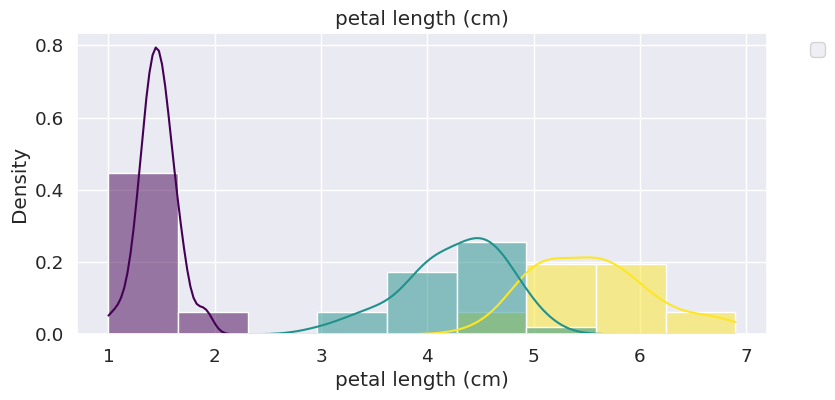

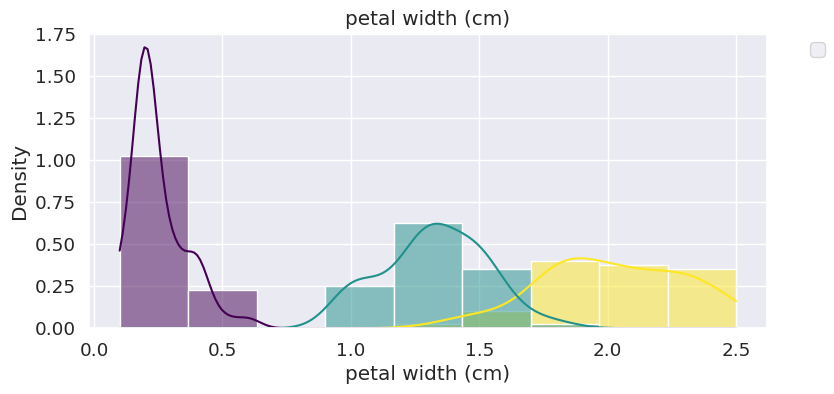

In [18]:
plot_histogram(iris,hue_groups='target')

### Correlação

Text(0.5, 1.0, 'Correlation between variables')

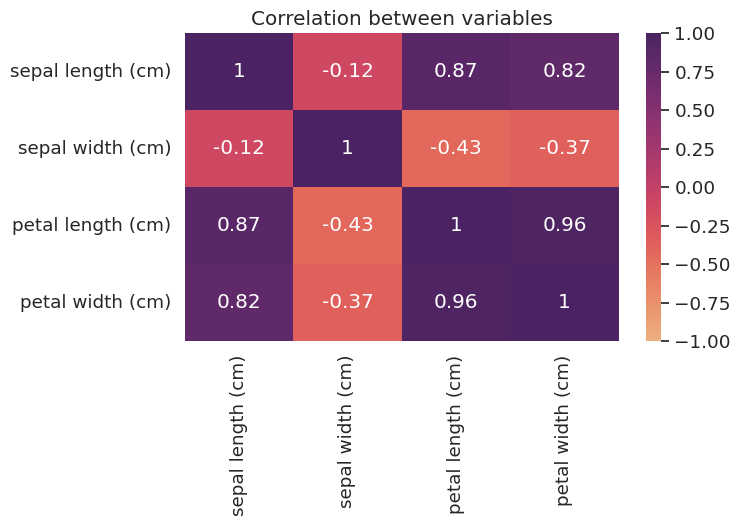

In [19]:
# Plot correlation matrix

# Set window size
plt.figure(figsize=(7,4))

# Plot heatmap
sns.heatmap(iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].corr(), annot=True, cmap='flare', vmin=-1, vmax=1)

# Add titles
plt.title('Correlation between variables')

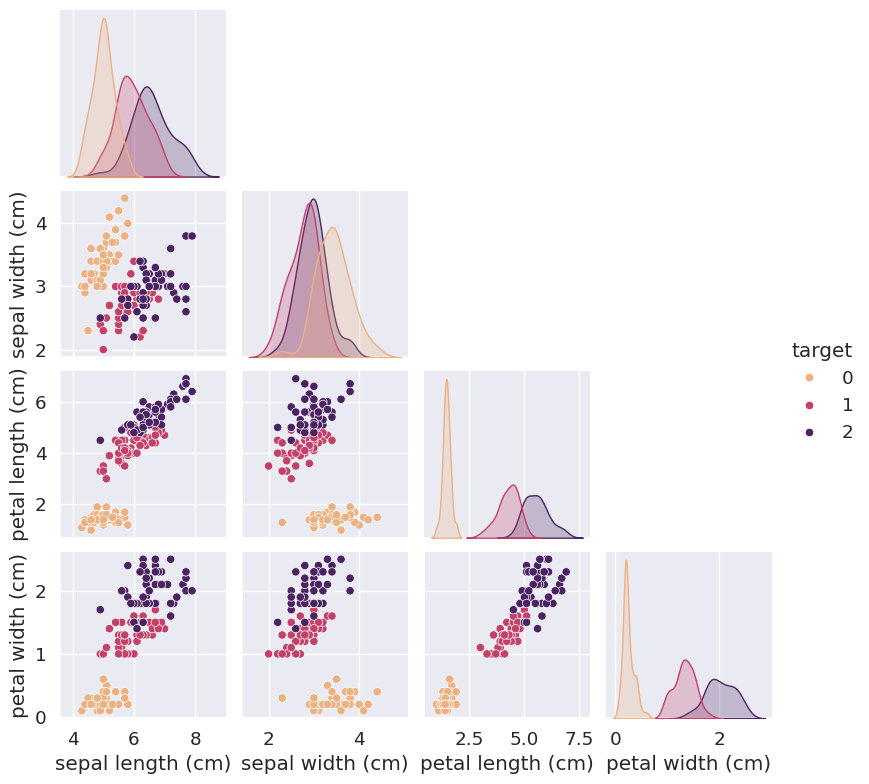

In [20]:
# Seaborn plot for pairwise relationship
# The diagonal elements in a pairplot show the histogram by default
sns.pairplot(iris, hue="target", size=2, diag_kind="kde", palette = "flare", corner=True)

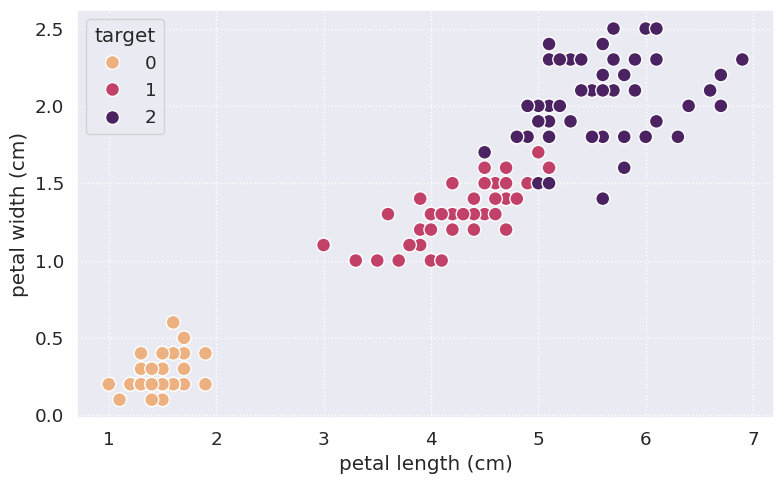

In [21]:
# Create scatter plot
# Set window size
fig,ax = plt.subplots(figsize=(8, 5))

# Plot
ax = sns.scatterplot(data=iris, x='petal length (cm)', y='petal width (cm)', s=100, hue='target', palette='flare', edgecolor="white", linewidth=1)

# Add gridlines
plt.grid(True, linestyle=':')

# Set style
plt.style.use('default')
fig.patch.set_facecolor('xkcd:white')
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig.tight_layout()

# Show graph
plt.show()

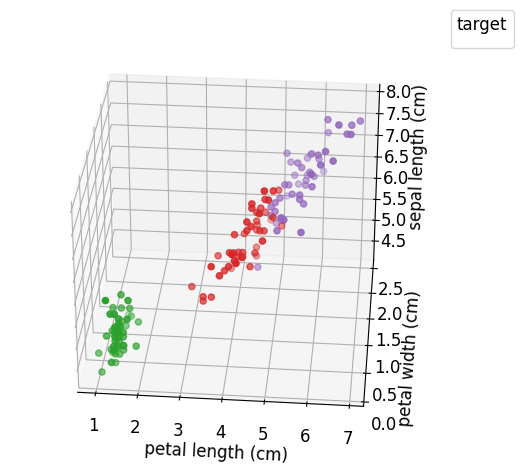

In [22]:
plot_3d(iris,'petal length (cm)','petal width (cm)','sepal length (cm)','target')

Não foi possível visualizar uma clara divisão entre as 3 espécies somente olhando os gráficos das propriedades

## Transformações Numéricas

Podemos utilizar as operações de normalização e padronização usando a biblioteca **Scikit-learn**:
* Para normalizar os dados, usamos o *MinMaxScaler* (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).
* Para padronizar os dados, usamos o *StandardScaler* (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).


### Normalização

y = (x – min) / (max – min)

In [23]:
# Normalização

# definindo o transformador como min max scaler
scaler = MinMaxScaler()

# transformando os dados
scaled = scaler.fit_transform(iris[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
print(scaled)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

### Padronização

média = soma (x) / contagem (x)

desvio_ padrão = sqrt (soma ((x - média) ^ 2) / contagem (x))

y = (x - média) / desvio padrão


In [24]:
# Padronização

# definindo o transformador como standard scaler
scaler = StandardScaler()

# transformando os dados
scaled = scaler.fit_transform(iris[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
print(scaled)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

## Modelo

Logistic Regression

In [25]:
# Data preparation
# the attribute test_size=0.2 splits the data into 80% and 20% ratio. train=80% and test=20%
test_size = 0.30 # size of test set
seed = 7 # set random seed
np.random.seed(7) # set random seed

# Load the Iris dataset
X = iris[iris.columns[:-1]]
y = iris['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout with stratification

In [26]:
# Print size of test and training set
print("Train set size: %d\nTest set size: %d\n" % (len(X_train),len(X_test)))

Train set size: 105
Test set size: 45



In [27]:
# Find unique elements and their counts in the array using np.unique() with return_counts=True
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

# Create a NumPy array from the unique elements and their respective counts
result_train = np.asarray((unique_train, counts_train))
result_test = np.asarray((unique_test, counts_test))

# Print the unique array and their frequencies
print("Frequency of training set:\n",result_train)
print("Frequency of test set:\n",result_test)

Frequency of training set:
 [[ 0  1  2]
 [35 35 35]]
Frequency of test set:
 [[ 0  1  2]
 [15 15 15]]


In [28]:
# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200, random_state=seed))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))

In [29]:
# Parameters and partitions for cross-validation
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # cross-validation with stratification

In [30]:
# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.4f (%.4f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

LR-orig: 0.9518 (0.0483)
LR-padr: 0.9518 (0.0483)
LR-norm: 0.9227 (0.0592)


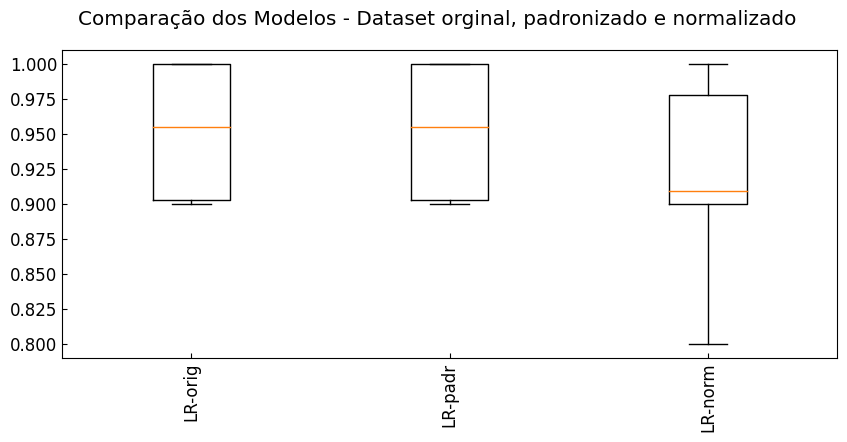

In [31]:
# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(10,4))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Modelo original

In [32]:
# Initialize the logistic regression model
logreg_model = LogisticRegression(max_iter=200, random_state=seed)

In [33]:
# Parameters and partitions for cross-validation
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # cross-validation with stratification

In [34]:
# Evaluate model using cross-validation
cv_results = cross_val_score(logreg_model, X_train, y_train, cv=kfold, scoring=scoring)
msg = "Logistic Regression: %f (%f)" % (cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.951818 (0.048285)


In [35]:
# Train the Logistic Regression model
logreg_model.fit(X_train,y_train)

LogisticRegression(max_iter=200, random_state=7)

In [36]:
# Make predictions
y_pred = logreg_model.predict(X_test) # apply model
y_pred_proba = logreg_model.predict_proba(X_test)[:, 1] # get probability

In [37]:
print('The accuracy of the Logistic Regression is %.4f\n'%(metrics.accuracy_score(y_test,y_pred)))

The accuracy of the Logistic Regression is 0.9333



In [38]:
# Calculate metrics
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision and recall
# Since iris dataset has multiple classes, we need to specify the average parameter
# 'weighted': Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

Acurácia: 0.933
Precisão: 0.935
Recall: 0.933


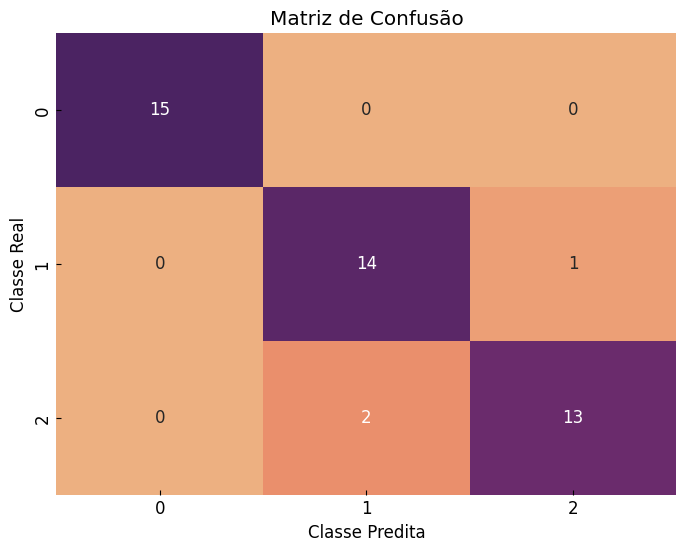

In [39]:
# Print metrics
print("Acurácia: %.3f" % accuracy)
print("Precisão: %.3f" % precision)
print("Recall: %.3f" % recall)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='flare', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')

# Show graph
plt.show()

### Modelo com padronização

Standardization: Centers the data around the mean with a unit standard deviation (z-score normalization)

Logistic Regression: 0.951818 (0.048285)
Acurácia: 0.978
Precisão: 0.979
Recall: 0.978


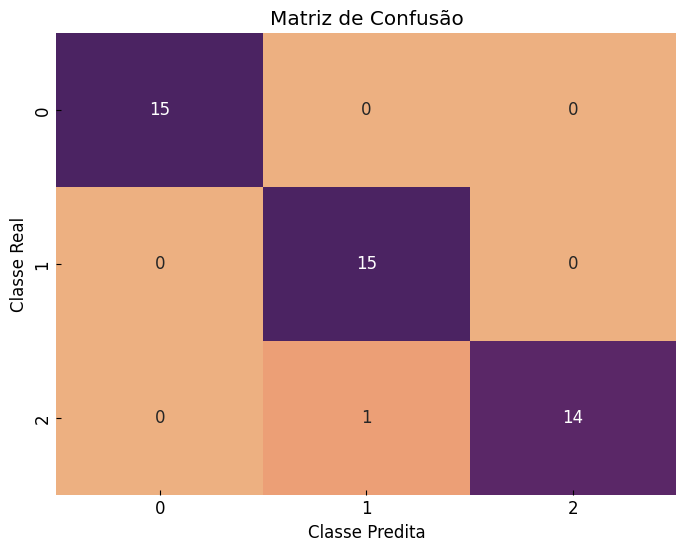

In [40]:
# Standardize the features
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Initialize the logistic regression model
logreg_sc_model = LogisticRegression(max_iter=200, random_state=seed)

# Evaluate model using cross-validation
cv_results_sc = cross_val_score(logreg_sc_model, X_train_sc, y_train, cv=kfold, scoring=scoring)
msg = "Logistic Regression: %f (%f)" % (cv_results_sc.mean(), cv_results_sc.std())
print(msg)

# Fit the model on the entire training data
logreg_sc_model.fit(X_train_sc, y_train)

# Make predictions on the test set
y_pred_sc = logreg_sc_model.predict(X_test_sc)
y_pred_sc_proba = logreg_sc_model.predict_proba(X_test_sc)[:, 1] # get probability

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_sc)
print("Acurácia: %.3f" % accuracy)

# Calculate precision and recall
precision = precision_score(y_test, y_pred_sc, average='weighted')
recall = recall_score(y_test, y_pred_sc, average='weighted')

# Print metrics
print("Precisão: %.3f" % precision)
print("Recall: %.3f" % recall)

# Plot the confusion matri

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_sc)

# Plot the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='flare', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')

# Show graph
plt.show()

Neste modelo aplicou-se a Regressão Logística para classificação do dataset Iris. Foram separados 70% dos dados para treino e reservado 30% para teste.

O modelo de classificação utilizando dados padronizados obteve melhor acurácia (97.8 %) do que com dados sem tratamento.

## Avaliação do modelo

In [41]:
# Display metrics report
report = classification_report(y_test, y_pred_sc)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



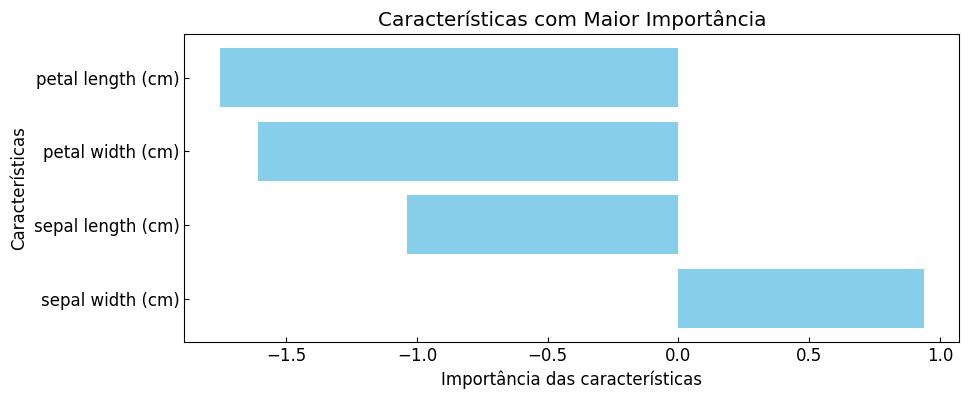

In [42]:
# Obtendo os coeficientes do modelo (importância das características)
coefficients = logreg_sc_model.coef_[0]
feature_names = X.columns

# Ordenando os índices das características pelos coeficientes
indices = np.argsort(np.abs(coefficients))

# Top 10 características com maior importância
top_features = feature_names[indices][-10:]
top_importances = coefficients[indices][-10:]

# Plotando as top features com suas importâncias
plt.figure(figsize=(10,4))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Importância das características')
plt.ylabel('Características')
plt.title('Características com Maior Importância')
plt.show()

In [43]:
# Criando um DataFrame para a tabela de regressão
regression_table = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Ordenando as features pelos coeficientes em ordem decrescente
regression_table = regression_table.reindex(regression_table['Coefficient'].abs().sort_values(ascending=False).index)

# Exibindo a tabela
print(regression_table)

             Feature  Coefficient
2  petal length (cm)    -1.755807
3   petal width (cm)    -1.610089
0  sepal length (cm)    -1.039209
1   sepal width (cm)     0.939617


Checagem de qual linha foi classificada incorretamente.

In [44]:
# Create a table to store features, target and prediction of teste set
test_check = pd.DataFrame(X_test_sc,columns=X.columns).copy()
test_check["Previsao_Modelo"] = y_pred_sc
test_check["Probabilidade_classe"] = y_pred_sc_proba
test_check['Classe'] = y_test.values

In [45]:
# Filter rows where the predictions are different from the actual class labels
test_check[test_check["Previsao_Modelo"] != test_check['Classe']]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Previsao_Modelo,Probabilidade_classe,Classe
36,-1.155798,-1.278297,0.384995,0.633454,1,0.650847,2


# Digits

Optical Recognition of Handwritten Digits

The data set contains images of hand-written digits: 10 classes where each class refers to a digit.

Data Set Characteristics:

Number of Instances:
1797

Number of Attributes:
64

Attribute Information:
8x8 image of integer pixels in the range 0..16.

Missing Attribute Values:
None

Creator:
Alpaydin (alpaydin ‘@’ boun.edu.tr)

Date:
July; 1998

## Carga de dados

In [46]:
# Import iris dataset from Scikit-Learn
digits_data = datasets.load_digits(as_frame=True)

In [47]:
# Get dataframe
digits = digits_data.frame

In [48]:
# Show first lines
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [49]:
dir(digits_data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

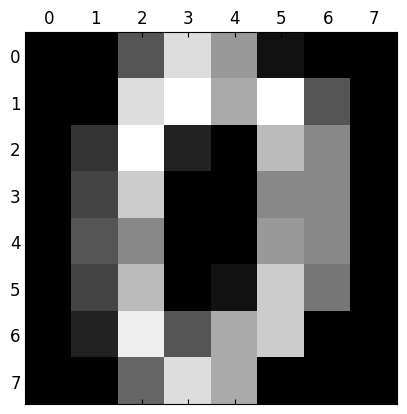

In [50]:
plt.gray()
plt.matshow(digits_data.images[0])
plt.show()

## Análise Inicial

In [51]:
# dataset size
digits.shape

(1797, 65)

In [52]:
# Check data type of columns
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [53]:
# Checking for missing values
digits.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

In [54]:
# Summary statistics of numerical columns
digits.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [55]:
# Data transformation
# Make a copy of dataset
digits_labels = digits.copy()
# dummy from int to object
digits_labels['target']= digits_labels['target'].astype('object')

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64


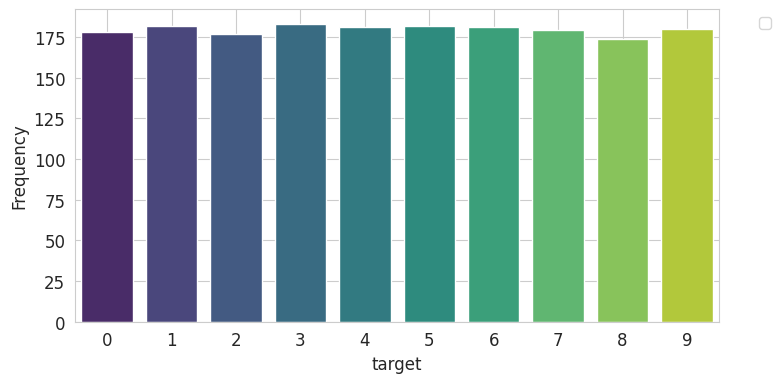

In [56]:
# Count
print(digits_labels['target'].value_counts())
plot_count(digits_labels)

A base de dados esta bem equilibrada contendo quantidade de observações próximas por classe, aproximadamente 180 para cada espécie. A classe com menor número contém 174 linhas e a maior possui 183.

O dataset possui:

* 1797 observações

* ~180 observações por classificação

* Não apresenta nulos

* 10 classificações:
 números de 0 a 9

* 64 atributos (todos numéricos):
 inteiros de 0 a 16



## Modelo de Classificação

In [57]:
# Data preparation
# the attribute test_size=0.2 splits the data into 80% and 20% ratio. train=80% and test=20%
test_size = 0.20 # size of test set
seed = 7 # set random seed
np.random.seed(7) # set random seed

# Load the Iris dataset
X = digits[digits.columns[:-1]]
y = digits['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout with stratification

In [58]:
# Print size of test and training set
print("Train set size: %d\nTest set size: %d\n" % (len(X_train),len(X_test)))

Train set size: 1437
Test set size: 360



In [59]:
# Find unique elements and their counts in the array using np.unique() with return_counts=True
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

# Create a NumPy array from the unique elements and their respective counts
result_train = np.asarray((unique_train, counts_train))
result_test = np.asarray((unique_test, counts_test))

# Print the unique array and their frequencies
print("Frequency of training set:\n",result_train)
print("Frequency of test set:\n",result_test)

Frequency of training set:
 [[  0   1   2   3   4   5   6   7   8   9]
 [142 145 142 146 145 146 145 143 139 144]]
Frequency of test set:
 [[ 0  1  2  3  4  5  6  7  8  9]
 [36 37 35 37 36 36 36 36 35 36]]


In [60]:
# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200, random_state=seed))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))

In [61]:
# Parameters and partitions for cross-validation
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # cross-validation with stratification

In [62]:
# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.4f (%.4f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

LR-orig: 0.9596 (0.0124)
LR-padr: 0.9666 (0.0107)
LR-norm: 0.9652 (0.0083)


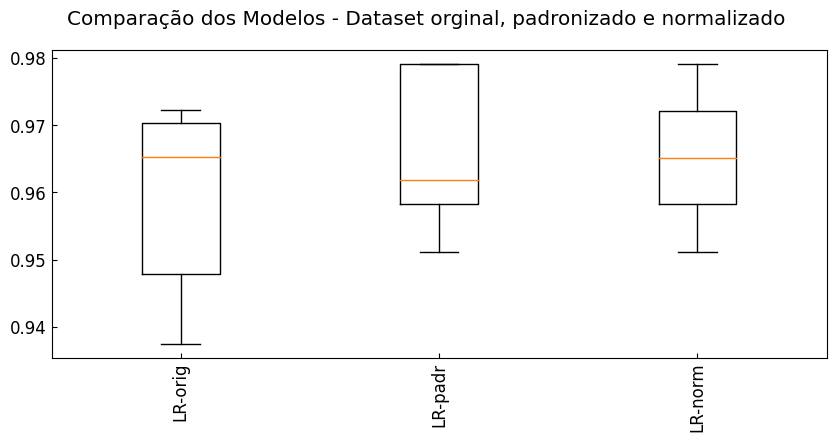

In [63]:
# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(10,4))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Modelo com padronização

Standardization: Centers the data around the mean with a unit standard deviation (z-score normalization)

Logistic Regression: 0.966589 (0.010723)
Acurácia: 0.981
Precisão: 0.981
Recall: 0.981


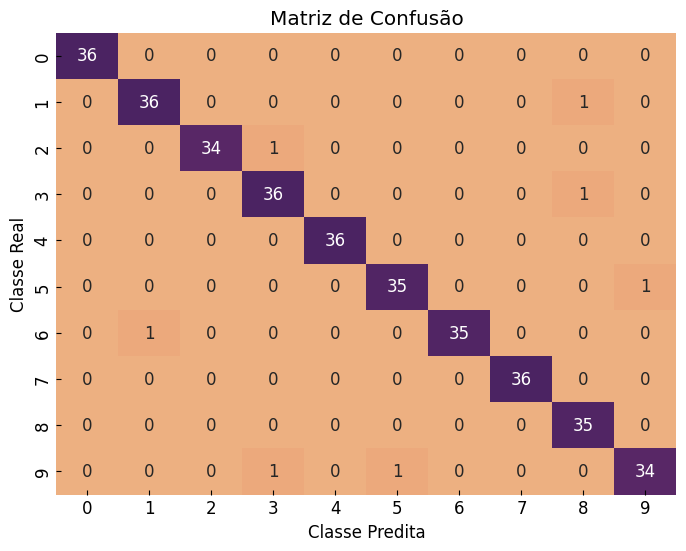

In [65]:
# Standardize the features
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Initialize the logistic regression model
logreg_sc_model = LogisticRegression(max_iter=200, random_state=seed)

# Evaluate model using cross-validation
cv_results_sc = cross_val_score(logreg_sc_model, X_train_sc, y_train, cv=kfold, scoring=scoring)
msg = "Logistic Regression: %f (%f)" % (cv_results_sc.mean(), cv_results_sc.std())
print(msg)

# Fit the model on the entire training data
logreg_sc_model.fit(X_train_sc, y_train)

# Make predictions on the test set
y_pred_sc = logreg_sc_model.predict(X_test_sc)
y_pred_sc_proba = logreg_sc_model.predict_proba(X_test_sc)[:, 1] # get probability

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_sc)
print("Acurácia: %.3f" % accuracy)

# Calculate precision and recall
precision = precision_score(y_test, y_pred_sc, average='weighted')
recall = recall_score(y_test, y_pred_sc, average='weighted')

# Print metrics
print("Precisão: %.3f" % precision)
print("Recall: %.3f" % recall)

# Plot the confusion matri

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_sc)

# Plot the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='flare', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')

# Show graph
plt.show()

## Avaliação do modelo

In [66]:
# Display metrics report
report = classification_report(y_test, y_pred_sc)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      0.97      0.97        37
           2       1.00      0.97      0.99        35
           3       0.95      0.97      0.96        37
           4       1.00      1.00      1.00        36
           5       0.97      0.97      0.97        36
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.95      1.00      0.97        35
           9       0.97      0.94      0.96        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



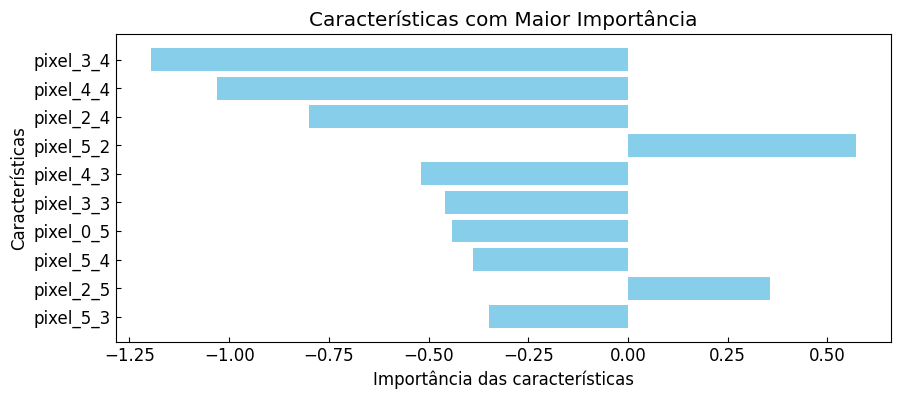

In [67]:
# Obtendo os coeficientes do modelo (importância das características)
coefficients = logreg_sc_model.coef_[0]
feature_names = X.columns

# Ordenando os índices das características pelos coeficientes
indices = np.argsort(np.abs(coefficients))

# Top 10 características com maior importância
top_features = feature_names[indices][-10:]
top_importances = coefficients[indices][-10:]

# Plotando as top features com suas importâncias
plt.figure(figsize=(10,4))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Importância das características')
plt.ylabel('Características')
plt.title('Características com Maior Importância')
plt.show()

In [68]:
# Criando um DataFrame para a tabela de regressão
regression_table = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Ordenando as features pelos coeficientes em ordem decrescente
regression_table = regression_table.reindex(regression_table['Coefficient'].abs().sort_values(ascending=False).index)

# Exibindo a tabela
print(regression_table)

      Feature  Coefficient
28  pixel_3_4    -1.195959
36  pixel_4_4    -1.031288
20  pixel_2_4    -0.799502
42  pixel_5_2     0.570760
35  pixel_4_3    -0.519611
..        ...          ...
48  pixel_6_0    -0.000072
56  pixel_7_0    -0.000030
0   pixel_0_0     0.000000
39  pixel_4_7     0.000000
32  pixel_4_0     0.000000

[64 rows x 2 columns]


## Checagem das predições

Checagem de qual linha foi classificada incorretamente.

In [69]:
# Create table to store target and prediction of teste set
test_check = pd.DataFrame(X_test_sc,columns=X.columns).copy()
test_check["Previsao_Modelo"] = y_pred_sc
test_check["Probabilidade_classe"] = y_pred_sc_proba
test_check['Classe'] = y_test.values

In [70]:
# Filter rows where the predictions are different from the actual class labels
test_check[test_check["Previsao_Modelo"] != test_check['Classe']][['Previsao_Modelo', 'Probabilidade_classe', 'Classe']]

,Previsao_Modelo,Probabilidade_classe,Classe
6,5,0.108263,9
22,9,0.013051,5
51,3,0.000003,2
147,3,0.000144,9
186,8,0.000039,3
199,1,0.831594,6
211,8,0.188386,1


## Eliminação recursiva de atributos

In [71]:
# Eliminação Recursiva de Atributos

# Criação do modelo
modelo = LogisticRegression(max_iter=200,random_state=seed)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=24)
fit = rfe.fit(X_train_sc, y_train)

# Print dos resultados
print("Atributos Originais:", X.columns)

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=X.columns))

Atributos Originais: Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'],
      dtype='object')

Atributos Selecionados: [False F

Logistic Regression: 0.961004 (0.011815)
Acurácia: 0.961
Precisão: 0.962
Recall: 0.961


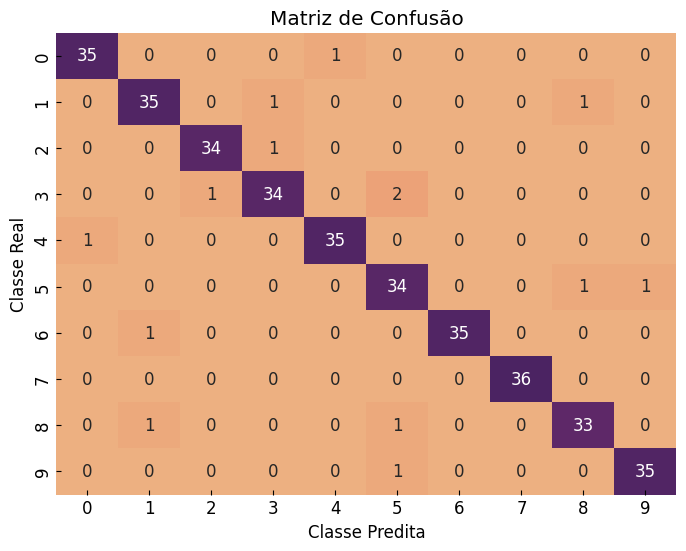

In [73]:
# Standardize the features
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train[['pixel_0_4','pixel_0_5','pixel_1_2','pixel_1_4','pixel_2_3','pixel_2_4','pixel_2_5','pixel_3_2',
 'pixel_3_3','pixel_3_4','pixel_3_6','pixel_4_1','pixel_4_4','pixel_4_6',
 'pixel_5_2','pixel_5_3','pixel_5_4','pixel_5_5','pixel_6_3','pixel_6_4','pixel_6_5','pixel_6_6',
 'pixel_7_2','pixel_7_5']])
X_test_sc = scaler.transform(X_test[['pixel_0_4','pixel_0_5','pixel_1_2','pixel_1_4','pixel_2_3','pixel_2_4','pixel_2_5','pixel_3_2',
 'pixel_3_3','pixel_3_4','pixel_3_6','pixel_4_1','pixel_4_4','pixel_4_6',
 'pixel_5_2','pixel_5_3','pixel_5_4','pixel_5_5','pixel_6_3','pixel_6_4','pixel_6_5','pixel_6_6',
 'pixel_7_2','pixel_7_5']])

# Initialize the logistic regression model
logreg_sc_model = LogisticRegression(max_iter=200, random_state=seed)

# Evaluate model using cross-validation
cv_results_sc = cross_val_score(logreg_sc_model, X_train_sc, y_train, cv=kfold, scoring=scoring)
msg = "Logistic Regression: %f (%f)" % (cv_results_sc.mean(), cv_results_sc.std())
print(msg)

# Fit the model on the entire training data
logreg_sc_model.fit(X_train_sc, y_train)

# Make predictions on the test set
y_pred_sc = logreg_sc_model.predict(X_test_sc)
y_pred_sc_proba = logreg_sc_model.predict_proba(X_test_sc)[:, 1] # get probability

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_sc)
print("Acurácia: %.3f" % accuracy)

# Calculate precision and recall
precision = precision_score(y_test, y_pred_sc, average='weighted')
recall = recall_score(y_test, y_pred_sc, average='weighted')

# Print metrics
print("Precisão: %.3f" % precision)
print("Recall: %.3f" % recall)

# Plot the confusion matri

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_sc)

# Plot the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='flare', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')

# Show graph
plt.show()